In [2]:
import numpy as np
import numpy.linalg
import pandas as pd
import sklearn
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics, sklearn.decomposition
import scipy.spatial
import matplotlib.pyplot as plt
import seaborn as sns

# Načtení dat

In [13]:
bars = pd.read_csv('datasets/bars.csv', header=None).values
bars_noise_20 = pd.read_csv('datasets/bars_noise20.csv', header=None).values
bars_noise_50 = pd.read_csv('datasets/bars_noise50.csv', header=None).values

In [5]:
bars.shape

(10000, 64)

In [11]:
bars[1]

array([  0,   0, 255,   0,   0,   0,   0,   0,   0,   0, 255,   0,   0,
         0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0,   0,
       255,   0,   0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255,
       255,   0,   0, 255,   0,   0,   0,   0,   0, 255, 255, 255, 255,
       255, 255, 255, 255,   0,   0, 255,   0,   0,   0,   0,   0])

In [12]:
bars_noise_20[1]

array([  0,   0, 225,   0,   0,   0,  48,   0,  44,   0, 220,  70,   0,
        54,   0,  70,   6,   0, 186,   0,   0,   0,   0,  48,   8,   0,
       255,  15,   0,   0,  14,  60, 255, 173, 193, 225, 255, 169, 164,
       255,   0,  80, 166,  81,   0,   0,   8, 112, 255, 241, 255, 255,
       236, 255, 255, 255,   0,   0, 255,   1,   0,   6, 120,   5])

In [14]:
bars_noise_50[1]

array([  8,   0, 132,   0,   0,   0, 255,   0,   0,   0, 255,  75,  74,
         0,  62,   0,  49, 124, 255, 197,  36, 126,   0,  39,  97,   0,
       201,   0, 144,   0, 141,   0, 255, 181,  87,   3, 165, 255,   0,
       192,  89,   0, 183,  89,   0,   0, 183,   0, 255,  83, 255, 255,
       255,  83, 255, 255,   0,   0, 201, 105,   0,   0,   0, 134])

In [15]:
def show_image(x):
    plt.imshow(x.reshape((8,8)), cmap='Greys')

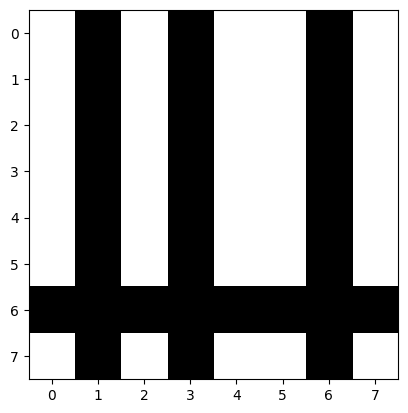

In [16]:
show_image(bars[2])

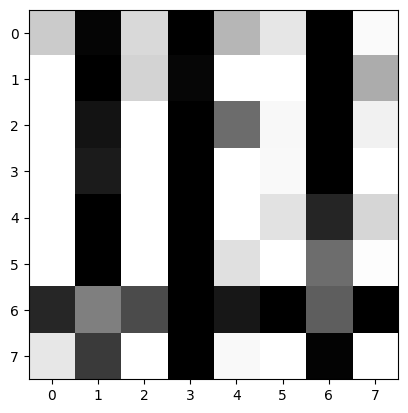

In [17]:
show_image(bars_noise_20[2])

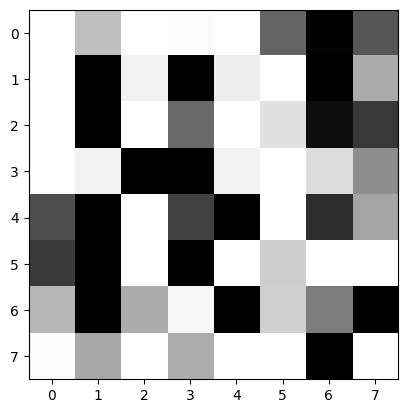

In [18]:
show_image(bars_noise_50[2])

# SVD dekompozice

Matice se rozloží na *U*, *s*, *V_T*:
- **U** - popisuje, jak se jednotlivé vzory (řádky) promítají do komponent
- **s** - určuje "sílu" a důležitost každé komponenty
- **V_T** - základní směry (vazby mezi sloupci)

In [19]:
U, s, V_T = np.linalg.svd(bars, full_matrices=True)
U.shape, s.shape, V_T.shape

((10000, 10000), (64,), (64, 64))

In [21]:
U

array([[-1.08972432e-02,  2.01964117e-02, -4.91278745e-03, ...,
        -1.18075450e-03, -1.58526309e-02,  1.67733941e-04],
       [-8.24356779e-03,  1.33925343e-02, -1.28584436e-02, ...,
        -1.93312596e-02,  1.27753259e-02,  1.17281025e-03],
       [-1.08472837e-02, -5.67100339e-03, -1.01820848e-02, ...,
         1.22972345e-02, -9.22430374e-03, -2.96053484e-03],
       ...,
       [-1.08772253e-02, -1.54149714e-02, -1.82290321e-02, ...,
         9.93364822e-01, -5.08613087e-05, -1.29995752e-04],
       [-1.08610212e-02, -1.16561023e-03, -6.14149882e-03, ...,
        -9.91734054e-05,  9.93532341e-01, -1.34512722e-04],
       [-8.23217930e-03,  1.16485797e-02, -7.65431007e-04, ...,
        -2.66882950e-04, -2.34413347e-05,  9.94480134e-01]],
      shape=(10000, 10000))

In [20]:
s

array([85163.72992057, 25918.78802989, 25885.20650461, 25866.61111402,
       25603.09250067, 25527.33634786, 25461.90923658, 25400.16904854,
       25323.96794768, 25273.05247869, 25090.65260469, 24985.09443308,
       24828.21166745, 24725.47151278, 24599.19377668,  4800.23207891,
        4759.42568525,  4752.02282845,  4714.65694697,  4693.37727937,
        4671.65765993,  4664.8800508 ,  4649.71482489,  4645.60988442,
        4627.47548092,  4613.28613569,  4608.32596123,  4601.90708787,
        4598.48440201,  4592.10180099,  4566.68918604,  4564.57307661,
        4539.47946295,  4528.18799301,  4515.34355164,  4503.88836915,
        4496.2987919 ,  4490.36008691,  4475.56266412,  4466.33868976,
        4461.80509601,  4454.28225144,  4444.18087738,  4433.82306676,
        4426.93951122,  4412.70949494,  4410.35912898,  4407.39023681,
        4392.68325091,  4367.7956838 ,  4356.32995984,  4352.68991712,
        4343.81015817,  4333.71349581,  4328.56992482,  4316.97332939,
      

In [22]:
np.diag(s)

array([[85163.72992057,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        , 25918.78802989,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        , 25885.20650461, ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
         4218.36279764,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,  4216.42652516,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,  4141.90618514]], shape=(64, 64))

In [41]:
R = U[:, :64].dot(np.diag(s)).dot(V_T)
bars-R

array([[-6.48659967e-14,  8.29910983e-12,  9.73510518e-12, ...,
        -8.46966941e-12, -1.04591891e-11, -1.15676357e-11],
       [-1.85288541e-13,  2.40135870e-14, -1.36992639e-11, ...,
        -6.21745194e-12, -1.17645085e-11, -2.23671369e-11],
       [-1.31459370e-13,  5.11590770e-13, -1.35046280e-12, ...,
         9.37312186e-12,  1.36424205e-11,  2.77261029e-12],
       ...,
       [-1.20611222e-13,  2.55795385e-13, -2.27373675e-13, ...,
        -1.32521706e-12, -8.08687942e-13, -9.01041472e-13],
       [-4.54747351e-13, -7.72500839e-13,  2.64470023e-13, ...,
        -3.51599547e-13, -1.23746089e-13,  1.19371180e-12],
       [-3.91936770e-14,  1.74996514e-13,  4.08791973e-14, ...,
        -2.27373675e-13,  4.54747351e-13, -5.68434189e-13]],
      shape=(10000, 64))

## Použití pouze 2 hlavních vektorů (redukce na 2 dimenze)

In [42]:
U[:, :2]

array([[-0.01089724,  0.02019641],
       [-0.00824357,  0.01339253],
       [-0.01084728, -0.005671  ],
       ...,
       [-0.01087723, -0.01541497],
       [-0.01086102, -0.00116561],
       [-0.00823218,  0.01164858]], shape=(10000, 2))

In [43]:
U[:, :2].shape

(10000, 2)

In [44]:
V_T[:2, :]

array([[-0.12576034, -0.12583471, -0.12446459, -0.12522232, -0.12453633,
        -0.12479076, -0.12320246, -0.12501406, -0.12368075, -0.12438685,
        -0.12219952, -0.12274359, -0.1239547 , -0.12395804, -0.12242578,
        -0.12374513, -0.12579543, -0.12611035, -0.12475121, -0.12483118,
        -0.1258248 , -0.125511  , -0.1238515 , -0.12529944, -0.1255637 ,
        -0.12730238, -0.12488608, -0.12613748, -0.12474634, -0.12421956,
        -0.12321001, -0.12535877, -0.12649177, -0.12752608, -0.1254781 ,
        -0.12578643, -0.12522948, -0.12697614, -0.12493317, -0.12562678,
        -0.12440544, -0.12568559, -0.1242691 , -0.12305136, -0.12453197,
        -0.12403298, -0.12287156, -0.12450303, -0.12667953, -0.12667078,
        -0.12424151, -0.1246307 , -0.12455422, -0.1243726 , -0.12256402,
        -0.12524289, -0.12736486, -0.12835399, -0.12557424, -0.1263055 ,
        -0.12606162, -0.12555467, -0.12399751, -0.12668234],
       [-0.14879275, -0.3026219 , -0.14459322, -0.15534514, -0.

### Rekonstrukční matice

In [45]:
R = U[:,:2].dot(np.diag(s[:2])).dot(V_T[:2, :])
R.shape

(10000, 64)

Text(0.5, 1.0, 'Original image')

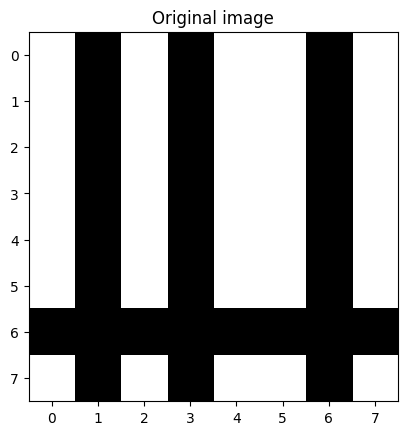

In [46]:
show_image(bars[2])
plt.title('Original image')

Text(0.5, 1.0, 'Reconstructed image when only 2 dimensions are used')

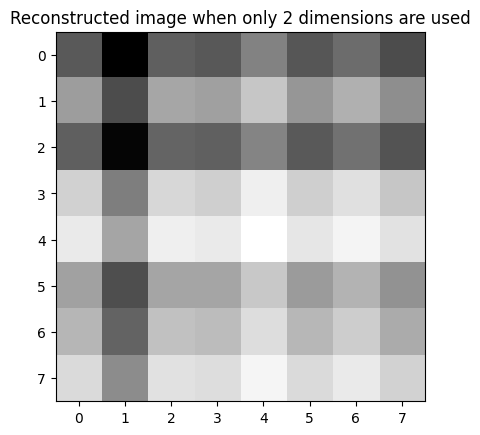

In [47]:
show_image(R[2])
plt.title('Reconstructed image when only 2 dimensions are used')

### Jaká je chyba rekonstruovaného obrázku?

In [48]:
print(bars[2]-R[2])

[-138.04716855   94.27346635 -136.23289444  116.48673785 -125.96066877
 -138.98746532  122.58700825 -141.59267083 -118.07959425  113.46785679
 -115.90146216  137.43546922 -106.93952453 -120.20670063  141.40095627
 -122.25953066 -136.25426227   96.05632658 -134.74150402  119.20907391
 -125.29088077 -138.00879748  124.00971646 -139.93253    -102.79335342
  127.78073069 -100.82071141  151.65415926  -90.43455688 -103.37698302
  158.09643653 -106.69051805  -92.40345806  138.77245118  -90.54209816
  162.7427821   -79.82437894  -94.14839564  168.13455856  -95.93784233
 -117.39758519  113.72534228 -116.21381398  138.68011369 -106.07904688
 -118.9003382   142.61895867 -121.36913667  143.21790805  120.05667386
  146.42920254  144.74909832  156.54241008  143.49260843  150.54840349
  140.33300022  -99.27338252  132.10322482  -96.51438041  156.62758269
  -86.3755825   -99.40850761  162.38652502 -102.56522281]


In [49]:
print(bars-R)

[[ -38.82384063   41.63154906  -39.81963441 ...   79.43797226
    61.80658956   85.92360073]
 [ -36.64173756   16.70295694  217.81021305 ... -127.29699695
  -138.85369633 -123.09399482]
 [-138.04716855   94.27346635 -136.23289444 ...  -99.40850761
   162.38652502 -102.56522281]
 ...
 [-175.94573272   17.52487671   81.93244352 ...  -71.24370697
   -55.24104867  -78.03726877]
 [ 134.18087392 -125.53528182 -119.4937329  ... -112.72620642
  -110.18491655  140.79602614]
 [ -43.24537368    3.14613226  -43.60485622 ...  132.92295362
   123.0119945   136.47664907]]


In [51]:
np.linalg.norm(bars-R)

np.float64(96381.65688074689)

## TASK 1: vyzkoušejte použití různých dimenzí

Proveďte SVD a rekonstruujte data pro dimenze 5, 10 a 16. Spočítejte rekonstrukční chybu pro dimenze 5, 10 a 16.

In [54]:
U, s, V_T = np.linalg.svd(bars, full_matrices=True)

Text(0.5, 1.0, 'Original image')

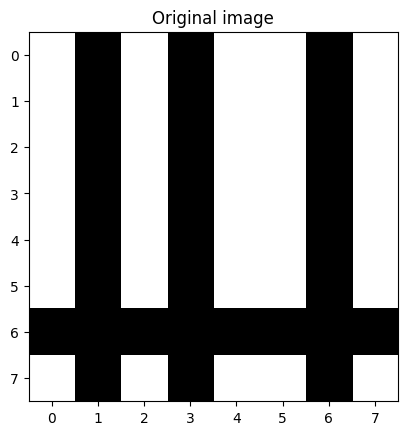

In [55]:
show_image(bars[2])
plt.title('Original image')

In [56]:
R_5= U[:,:5].dot(np.diag(s[:5])).dot(V_T[:5, :])

In [63]:
np.linalg.norm(bars-R_5)

np.float64(85409.48396501182)

Text(0.5, 1.0, 'Reconstructed image when only 5 dimensions are used')

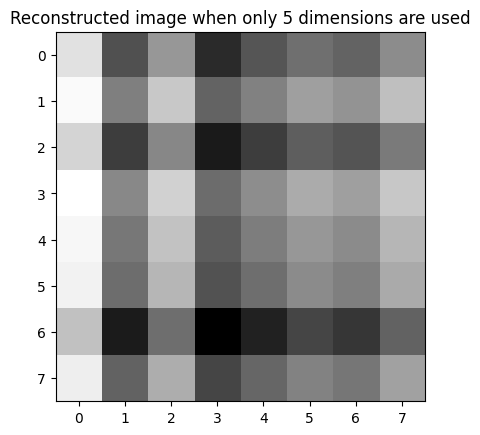

In [58]:
show_image(R_5[2])
plt.title('Reconstructed image when only 5 dimensions are used')

In [59]:
R_10 = U[:,:10].dot(np.diag(s[:10])).dot(V_T[:10, :])

In [64]:
np.linalg.norm(bars-R_10)

np.float64(63793.62904147387)

Text(0.5, 1.0, 'Reconstructed image when only 10 dimensions are used')

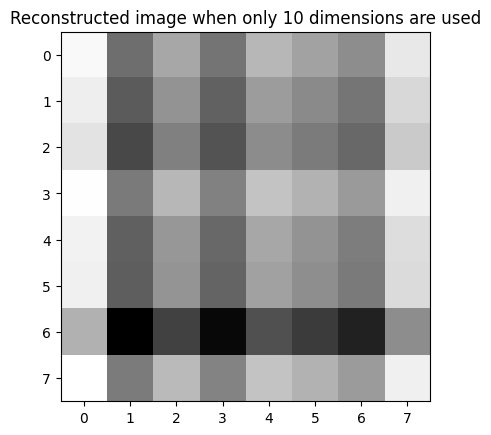

In [60]:
show_image(R_10[2])
plt.title('Reconstructed image when only 10 dimensions are used')

In [61]:
R_16 = U[:,:16].dot(np.diag(s[:16])).dot(V_T[:16, :])

In [65]:
np.linalg.norm(bars-R_16)

np.float64(30981.92562954602)

Text(0.5, 1.0, 'Reconstructed image when only 16 dimensions are used')

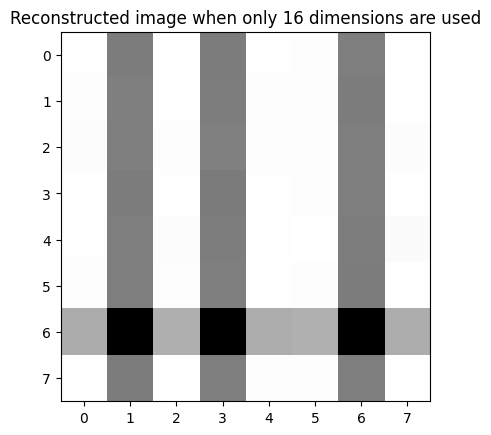

In [62]:
show_image(R_16[2])
plt.title('Reconstructed image when only 16 dimensions are used')

## TASK 2: kolik dimenzí je potřeba k dostatečnému zrekontruování obrázků s šumem 20 a 50?

Naše datové soubory bars_noise_20 a bars_noise_50 obsahují šum, chceme použít redukci dimenzí k eliminaci vlivu šumu v našem datovém souboru.
Vyzkoušejte různé počty dimenzí pro redukci dimenzí, vypočítejte Frobeniovu normu pro rekonstruovanou a původní matici, poté vytvořte graf s hodnotami chyb rekonstrukce.

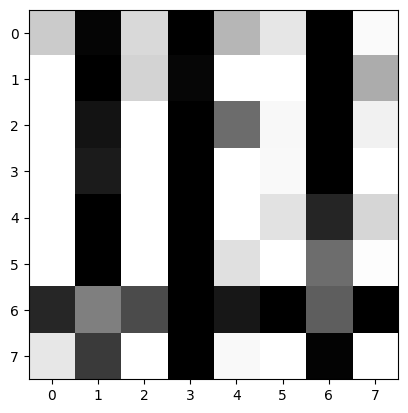

In [70]:
show_image(bars_noise_20[2])

In [76]:
np.linalg.norm(bars_noise_20, ord='fro')

np.float64(123656.5638937133)

In [67]:
U_20, s_20, V_T_20 = np.linalg.svd(bars_noise_20, full_matrices=True)

In [68]:
R_32 = U_20[:,:32].dot(np.diag(s_20[:32])).dot(V_T_20[:32, :])

np.float64(104967.33108238036)

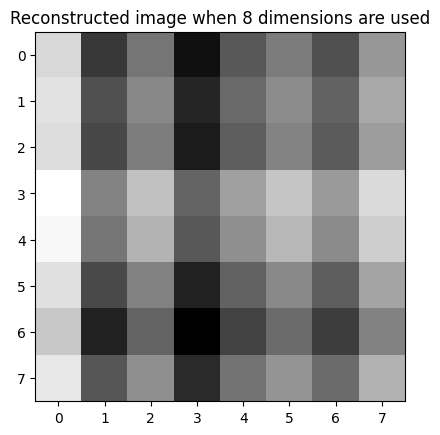

In [78]:
dimensions = 8
R = U_20[:,:dimensions].dot(np.diag(s_20[:dimensions])).dot(V_T_20[:dimensions, :])
show_image(R[2])
plt.title(f'Reconstructed image when {dimensions} dimensions are used')
np.linalg.norm(R, ord='fro')


np.float64(119117.60963764058)

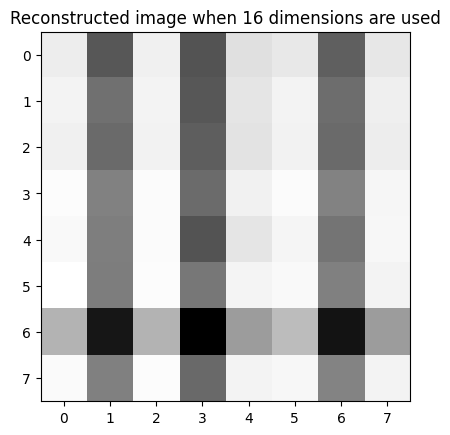

In [79]:
dimensions = 16
R = U_20[:,:dimensions].dot(np.diag(s_20[:dimensions])).dot(V_T_20[:dimensions, :])
show_image(R[2])
plt.title(f'Reconstructed image when {dimensions} dimensions are used')
np.linalg.norm(R, ord='fro')

np.float64(120767.1330967536)

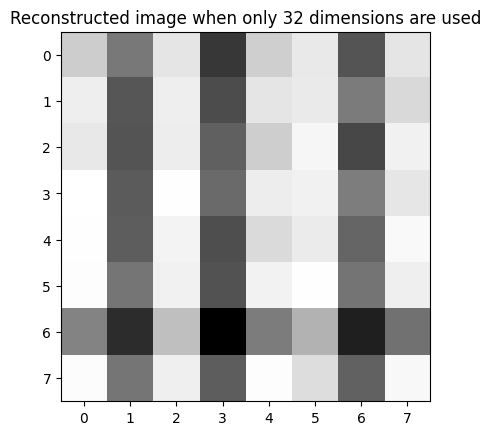

In [80]:
show_image(R_32[2])
plt.title('Reconstructed image when only 32 dimensions are used')
np.linalg.norm(R_32, ord='fro')

np.float64(122279.88554133929)

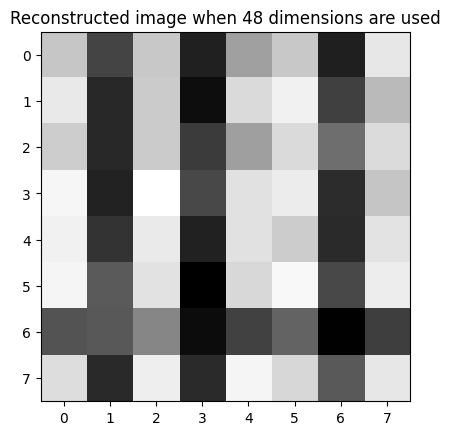

In [81]:
dimensions = 48
R = U_20[:,:dimensions].dot(np.diag(s_20[:dimensions])).dot(V_T_20[:dimensions, :])
show_image(R[2])
plt.title(f'Reconstructed image when {dimensions} dimensions are used')
np.linalg.norm(R, ord='fro')

np.float64(122985.81337098045)

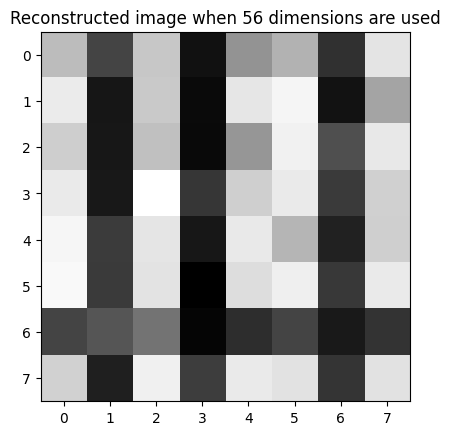

In [82]:
dimensions = 56
R = U_20[:,:dimensions].dot(np.diag(s_20[:dimensions])).dot(V_T_20[:dimensions, :])
show_image(R[2])
plt.title(f'Reconstructed image when {dimensions} dimensions are used')
np.linalg.norm(R, ord='fro')

(64,)


Text(0.5, 0, 'Počet použitých dimenzí')

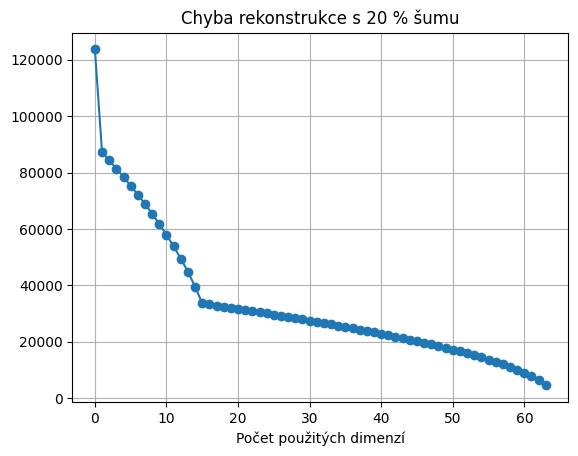

In [90]:
dimensions = 64
abs_errors = []
for k in range(dimensions):
    R = U_20[:,:k].dot(np.diag(s_20[:k])).dot(V_T_20[:k, :])
    np.linalg.norm(R, ord='fro')
    abs_errors.append(np.linalg.norm(bars_noise_20 - R, 'fro'))

abs_errors = np.array(abs_errors)
print(abs_errors.shape)
    
plt.figure()
plt.plot(range(dimensions), abs_errors, marker='o')
plt.grid(True)
plt.title("Chyba rekonstrukce s 20 % šumu")
plt.xlabel("Počet použitých dimenzí")

In [92]:
U_50, s_50, V_T_50 = np.linalg.svd(bars_noise_50, full_matrices=True)

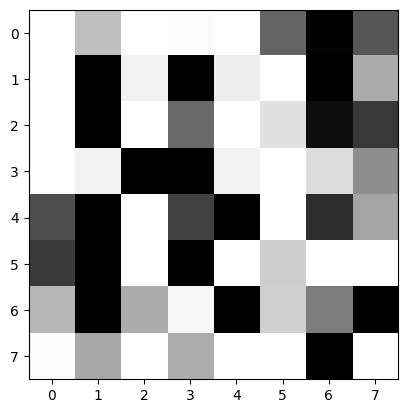

In [93]:
show_image(bars_noise_50[2])

(64,)


Text(0.5, 0, 'Počet použitých dimenzí')

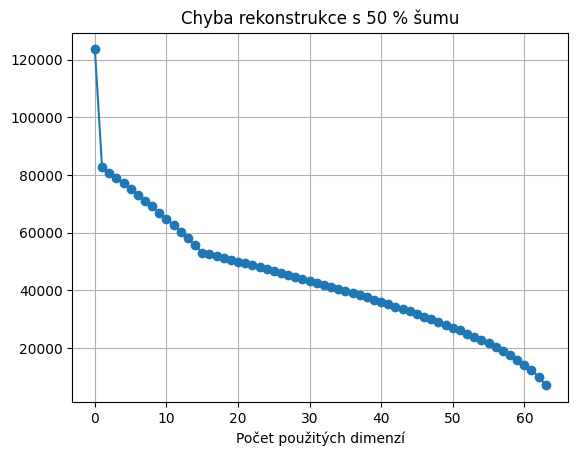

In [94]:
dimensions = 64
abs_errors = []
for k in range(dimensions):
    R = U_50[:,:k].dot(np.diag(s_50[:k])).dot(V_T_50[:k, :])
    np.linalg.norm(R, ord='fro')
    abs_errors.append(np.linalg.norm(bars_noise_50 - R, 'fro'))

abs_errors = np.array(abs_errors)
print(abs_errors.shape)
    
plt.figure()
plt.plot(range(dimensions), abs_errors, marker='o')
plt.grid(True)
plt.title("Chyba rekonstrukce s 50 % šumu")
plt.xlabel("Počet použitých dimenzí")

np.float64(111843.69461385907)

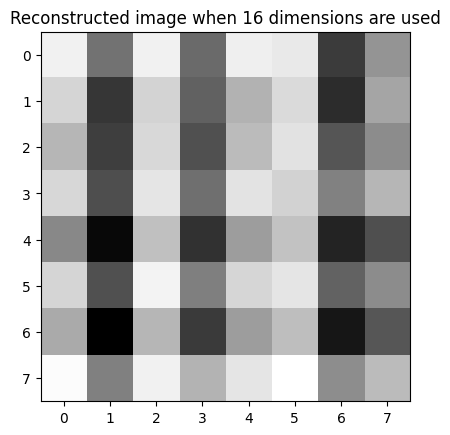

In [107]:
dimensions = 16
R = U_50[:,:dimensions].dot(np.diag(s_50[:dimensions])).dot(V_T_50[:dimensions, :])
show_image(R[2])
plt.title(f'Reconstructed image when {dimensions} dimensions are used')
np.linalg.norm(R, ord='fro')

# NNMF

NNMF vyžaduje nezáporná data. Proto je vhodné data oříznout nebo posunout.

In [108]:
from sklearn.decomposition import NMF

## TASK 3: aplikuj NNMF na bars datasety

Aplikujte NMF pro dimenze 2, 5, 10 a 16 (na bars i noisy varianty). Proveďte rekonstrukci a vypočítejte chybu.

In [111]:
def my_show_image(x, title=None):
    plt.figure()
    plt.imshow(x.reshape((8, 8)), cmap='Greys')
    if title:
        plt.title(title)
    plt.axis('off')

In [112]:
def NMF_application(D):
    for k in [2, 5, 10, 16]:
        model = NMF(n_components=k, init='nndsvda', random_state=0)
        W = model.fit_transform(D)
        H = model.components_
        R = W @ H
        
        my_show_image(R[2], title=f"k={k}")
    
        err = np.linalg.norm(D - R, 'fro')
        print(f"Error for dimension {k} is {err}")

Error for dimension 2 is 96440.94679195216
Error for dimension 5 is 85859.8339362431
Error for dimension 10 is 66128.94203853815
Error for dimension 16 is 37323.816711541105


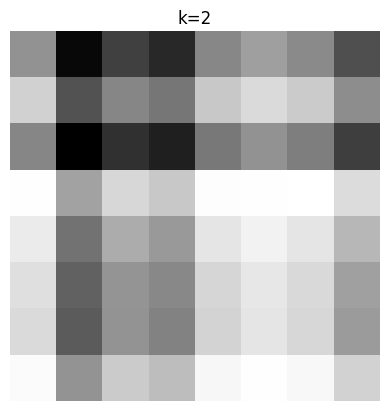

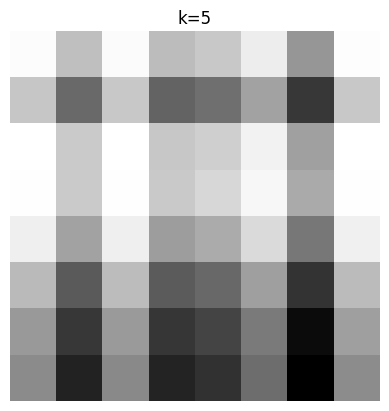

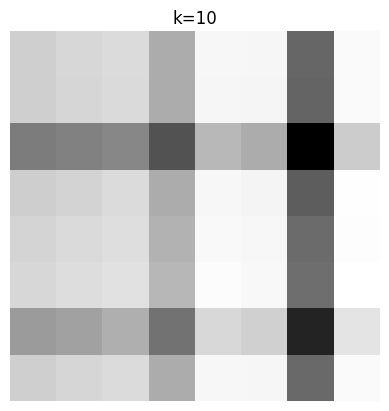

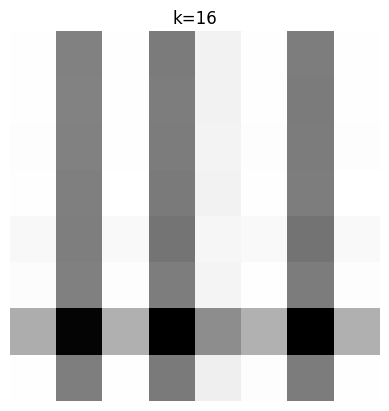

In [113]:
NMF_application(bars)

Error for dimension 2 is 84338.9638283583
Error for dimension 5 is 75759.86227756129
Error for dimension 10 is 59243.21643497553
Error for dimension 16 is 36578.78947770924


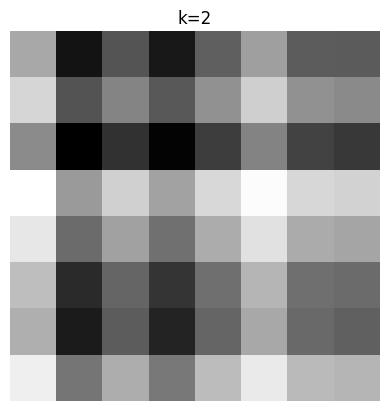

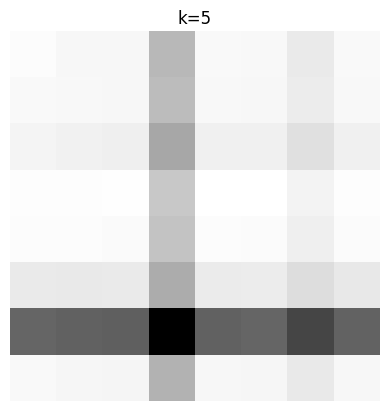

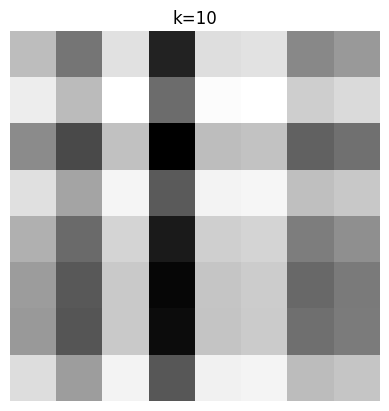

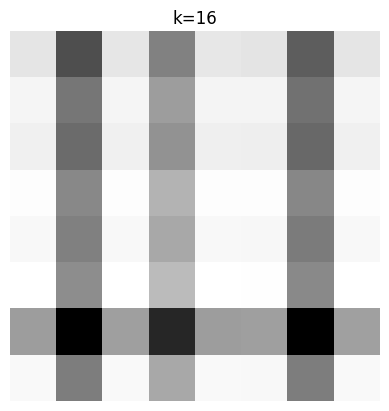

In [114]:
NMF_application(bars_noise_20)

Error for dimension 2 is 80897.53194092077
Error for dimension 5 is 75490.61850476815
Error for dimension 10 is 65545.72680378467
Error for dimension 16 is 53441.26514162129


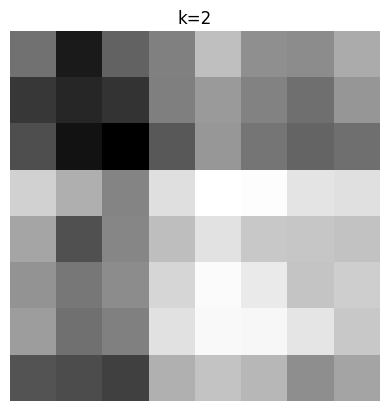

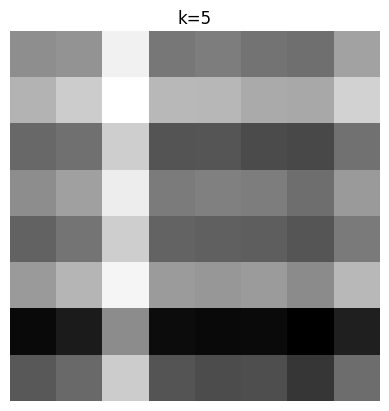

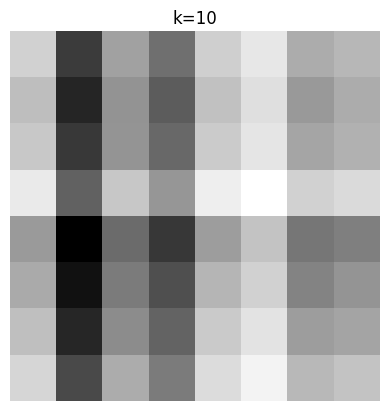

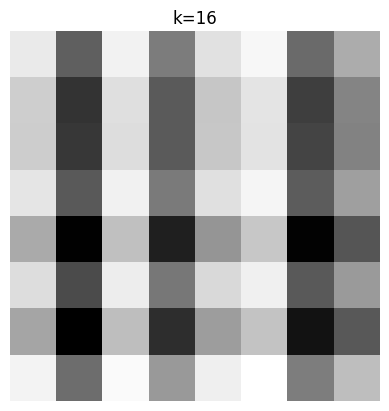

In [115]:
NMF_application(bars_noise_50)

# MNIST

In [4]:
mnist = pd.read_csv('datasets/mnist.csv', header=None).values
mnist_labels = pd.read_csv('datasets/mnist_labels.csv', header=None).values.flatten()

In [5]:
mnist.shape

(60000, 784)

In [118]:
mnist[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [119]:
def show_image_mnist(x):
    plt.imshow(x.reshape((28,28)), cmap='Greys')

Text(0.5, 1.0, 'Label: 0')

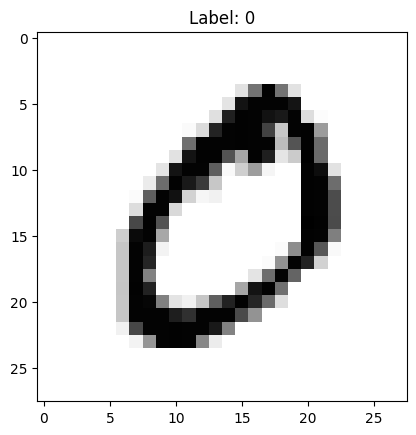

In [120]:
show_image_mnist(mnist[1])
plt.title(f'Label: {mnist_labels[1]}')

Text(0.5, 1.0, 'Label: 3')

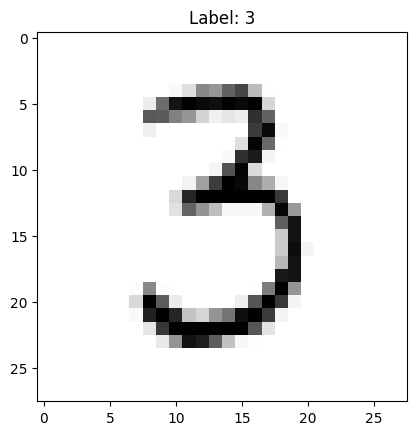

In [121]:
show_image_mnist(mnist[50])
plt.title(f'Label: {mnist_labels[50]}')

## TASK 4: 2D zobrazení pomocí SVD

Na dataset mnist aplikujte SVD rozklad a vizualizujte ve vektorovém prostoru. Body obarvěte pomocí labelů.

In [7]:
U_mnist, s_mnist, V_T_mnist = np.linalg.svd(mnist, full_matrices=False)

In [8]:
D2 = U_mnist[:,:2] @ np.diag(s_mnist[:2])

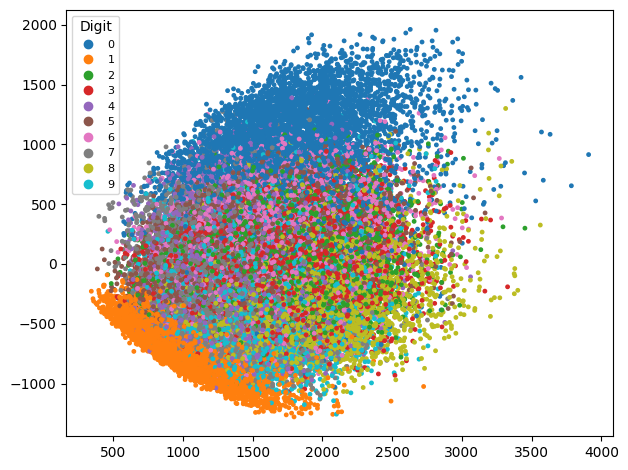

In [9]:
plt.figure()
scatter = plt.scatter(D2[:, 0], D2[:, 1], c=mnist_labels, s=6, cmap="tab10")
handles, _ = scatter.legend_elements(prop="colors", num=np.unique(mnist_labels).size)
plt.legend(handles, [str(i) for i in sorted(np.unique(mnist_labels))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

## TASK 5: Rekonstrukce z redukovaného SVD

Na dataset MNIST aplikujte SVD a pro různé počty dimenzí(např. 5, 10, 16, 20) vytvořte 2D projekce a vykreslete je jako scatter ploty s barvami podle labelů.

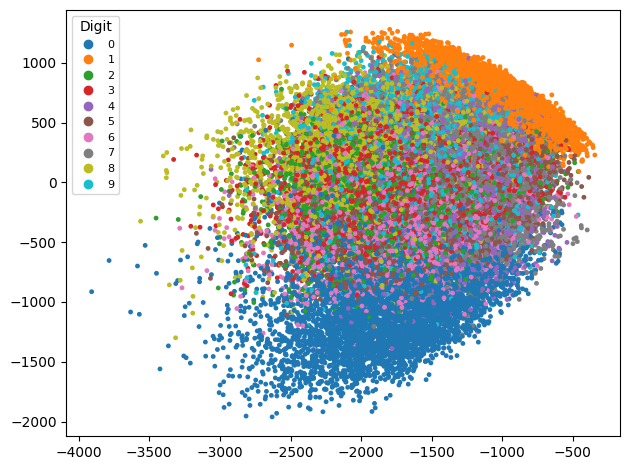

In [37]:
dimensions = 5
R = U_mnist[:,:dimensions].dot(np.diag(s_mnist[:dimensions])).dot(V_T_mnist[:dimensions, :])

U_mnist_R, s_mnist_R, V_T_mnist_R = np.linalg.svd(R, full_matrices=False)

D2 = U_mnist_R[:,:2] @ np.diag(s_mnist_R[:2])

plt.figure()
scatter = plt.scatter(D2[:, 0], D2[:, 1], c=mnist_labels, s=6, cmap="tab10")
handles, _ = scatter.legend_elements(prop="colors", num=np.unique(mnist_labels).size)
plt.legend(handles, [str(i) for i in sorted(np.unique(mnist_labels))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

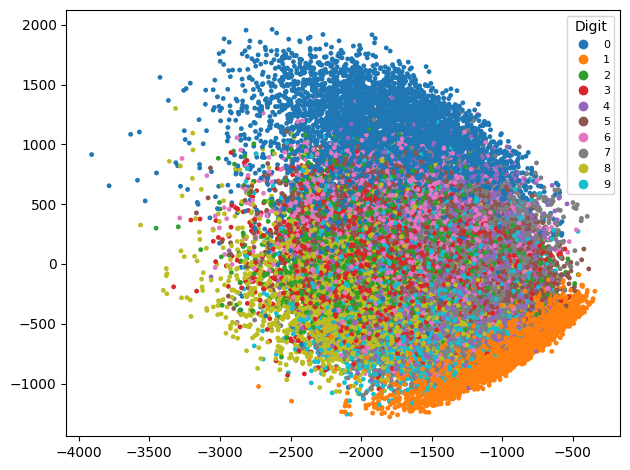

In [36]:
dimensions = 10
R = U_mnist[:,:dimensions].dot(np.diag(s_mnist[:dimensions])).dot(V_T_mnist[:dimensions, :])

U_mnist_R, s_mnist_R, V_T_mnist_R = np.linalg.svd(R, full_matrices=False)

D2 = U_mnist_R[:,:2] @ np.diag(s_mnist_R[:2])

plt.figure()
scatter = plt.scatter(D2[:, 0], D2[:, 1], c=mnist_labels, s=6, cmap="tab10")
handles, _ = scatter.legend_elements(prop="colors", num=np.unique(mnist_labels).size)
plt.legend(handles, [str(i) for i in sorted(np.unique(mnist_labels))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

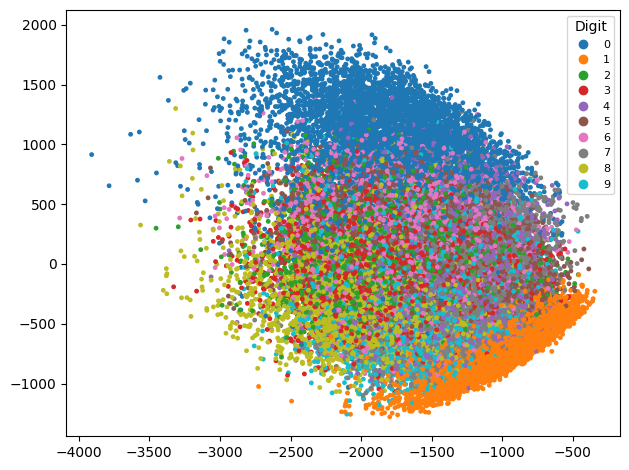

In [35]:
dimensions = 16
R = U_mnist[:,:dimensions].dot(np.diag(s_mnist[:dimensions])).dot(V_T_mnist[:dimensions, :])

U_mnist_R, s_mnist_R, V_T_mnist_R = np.linalg.svd(R, full_matrices=False)

D2 = U_mnist_R[:,:2] @ np.diag(s_mnist_R[:2])

plt.figure()
scatter = plt.scatter(D2[:, 0], D2[:, 1], c=mnist_labels, s=6, cmap="tab10")
handles, _ = scatter.legend_elements(prop="colors", num=np.unique(mnist_labels).size)
plt.legend(handles, [str(i) for i in sorted(np.unique(mnist_labels))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

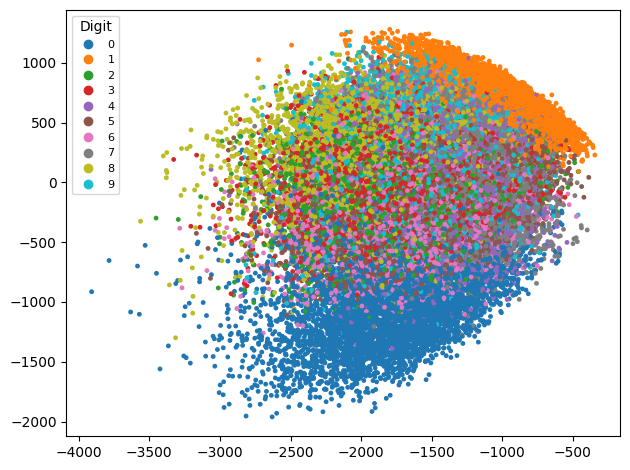

In [34]:
dimensions = 20
R = U_mnist[:,:dimensions].dot(np.diag(s_mnist[:dimensions])).dot(V_T_mnist[:dimensions, :])

U_mnist_R, s_mnist_R, V_T_mnist_R = np.linalg.svd(R, full_matrices=False)

D2 = U_mnist_R[:,:2] @ np.diag(s_mnist_R[:2])

plt.figure()
scatter = plt.scatter(D2[:, 0], D2[:, 1], c=mnist_labels, s=6, cmap="tab10")
handles, _ = scatter.legend_elements(prop="colors", num=np.unique(mnist_labels).size)
plt.legend(handles, [str(i) for i in sorted(np.unique(mnist_labels))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

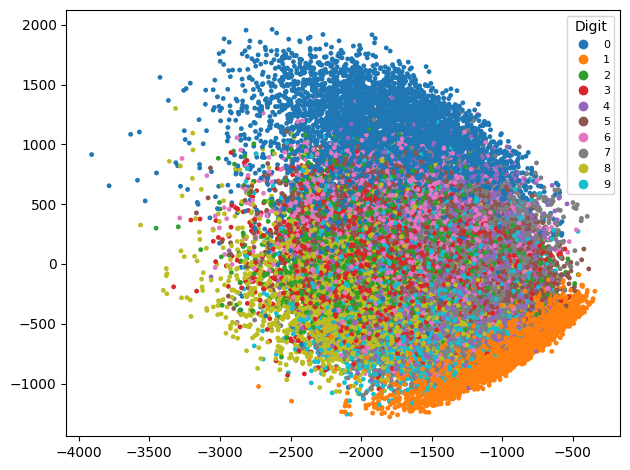

In [33]:
dimensions = 784
R = U_mnist[:,:dimensions].dot(np.diag(s_mnist[:dimensions])).dot(V_T_mnist[:dimensions, :])

U_mnist_R, s_mnist_R, V_T_mnist_R = np.linalg.svd(R, full_matrices=False)

D2 = U_mnist_R[:,:2] @ np.diag(s_mnist_R[:2])

plt.figure()
scatter = plt.scatter(D2[:, 0], D2[:, 1], c=mnist_labels, s=6, cmap="tab10")
handles, _ = scatter.legend_elements(prop="colors", num=np.unique(mnist_labels).size)
plt.legend(handles, [str(i) for i in sorted(np.unique(mnist_labels))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

# PCA a t-SNE

In [38]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [39]:
mnist_scaled = mnist.astype('float32') / 255.0

## TASK 6: 2D projekce PCA/t-SNE

Použijte matici mnist_scaled k redukci dimenze pomocí PCA a t-SNE do 2D a výsledky zobrazte jako scatter ploty s barvami podle labelů.


In [40]:
pca = PCA(n_components=2, svd_solver="randomized", random_state=0)
D2_pca = pca.fit_transform(mnist_scaled)

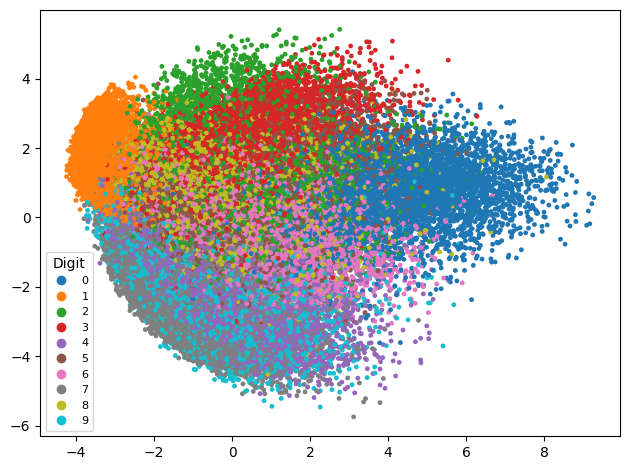

In [41]:
plt.figure()
scatter = plt.scatter(D2_pca[:, 0], D2_pca[:, 1], c=mnist_labels, s=6, cmap="tab10")
handles, _ = scatter.legend_elements(prop="colors", num=np.unique(mnist_labels).size)
plt.legend(handles, [str(i) for i in sorted(np.unique(mnist_labels))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

In [45]:
tsne = TSNE(n_components=2, perplexity=30, random_state=13)
D2_tsne = tsne.fit_transform(mnist_scaled)  

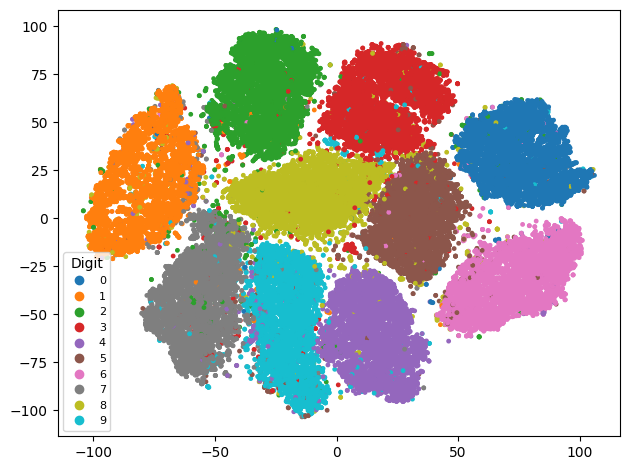

In [46]:
plt.figure()
scatter = plt.scatter(D2_tsne[:, 0], D2_tsne[:, 1], c=mnist_labels, s=6, cmap="tab10")
handles, _ = scatter.legend_elements(prop="colors", num=np.unique(mnist_labels).size)
plt.legend(handles, [str(i) for i in sorted(np.unique(mnist_labels))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

# Titanic

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/rasvob/VSB-FEI-Fundamentals-of-Machine-Learning-Exercises/master/datasets/titanic.csv', index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
df_clustering = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()

In [49]:
df_clustering = df_clustering.dropna()

In [50]:
df_encoded = pd.DataFrame(index = df_clustering.index)
df_encoded['Sex'] = sklearn.preprocessing.OrdinalEncoder().fit_transform(df_clustering[['Sex']])
df_encoded = df_encoded.join(pd.get_dummies(df_clustering[['Embarked']]))

In [51]:
col_names = ['Fare', 'Age', 'SibSp', 'Parch', 'Pclass']
enc = sklearn.preprocessing.StandardScaler()
X_stand = pd.DataFrame(enc.fit_transform(df_clustering.loc[:, col_names]), columns = col_names, index=df_clustering.index)
X_stand = pd.concat([X_stand, df_encoded.loc[:, ['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']], df_clustering.Survived], axis=1)

In [52]:
X_stand

,Fare,Age,SibSp,Parch,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S,Survived
PassengerId,,,,,,,,,,
1,-0.516380,-0.527669,0.522511,-0.506787,0.908600,1.0,False,False,True,0
2,0.694046,0.577094,0.522511,-0.506787,-1.482983,0.0,True,False,False,1
3,-0.503620,-0.251478,-0.552714,-0.506787,0.908600,0.0,False,False,True,1
4,0.350326,0.369951,0.522511,-0.506787,-1.482983,0.0,False,False,True,1
5,-0.501257,0.369951,-0.552714,-0.506787,0.908600,1.0,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...
886,-0.102875,0.646142,-0.552714,5.350885,0.908600,0.0,False,True,False,0
887,-0.407687,-0.182430,-0.552714,-0.506787,-0.287191,1.0,False,False,True,0
888,-0.086335,-0.734812,-0.552714,-0.506787,-1.482983,0.0,False,False,True,1


## BONUS TASK - Shlukování + 2D vizualizace (Titanic)

Použijte předzpracovanou matici X_scaled. Zvolte libovolný shlukovací algoritmus, najděte shluky a uložte labely jako cluster_id. Poté použijte PCA a t-SNE k redukci dimenze a vytvořte scatter ploty, kde barva bodů zobrazuje cluster_id.

In [53]:
clustering_scores = []
for k in range(2, 11):
    clustering = sklearn.cluster.KMeans(n_clusters=k, random_state=13).fit(X_stand)
    clustering_scores.append({
        'k': k,
        'sse': clustering.inertia_,
        'silhouette': sklearn.metrics.silhouette_score(X_stand, clustering.labels_)
    })
df_clustering_scores = pd.DataFrame.from_dict(clustering_scores, orient='columns')
df_clustering_scores = df_clustering_scores.set_index('k')

In [54]:
df_clustering_scores

,sse,silhouette
k,,
2,3220.959045,0.294501
3,2558.812133,0.329996
4,2249.903469,0.333074
5,1910.588997,0.320748
6,1752.006019,0.285566
7,1684.527188,0.275067
8,1505.026538,0.260910
9,1392.049760,0.239823
10,1343.715047,0.241729


<Axes: xlabel='k', ylabel='sse'>

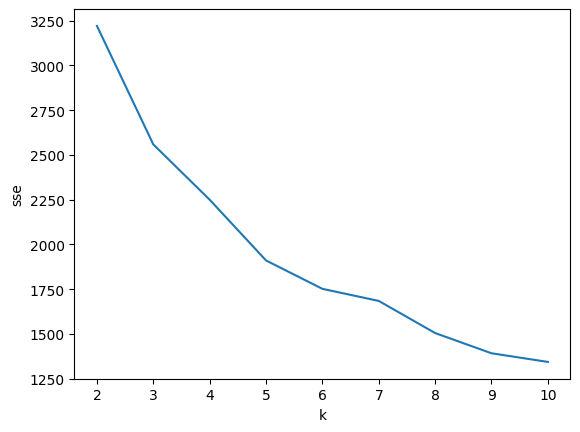

In [55]:
sns.lineplot(data = df_clustering_scores, y='sse', x='k')

<Axes: xlabel='k', ylabel='silhouette'>

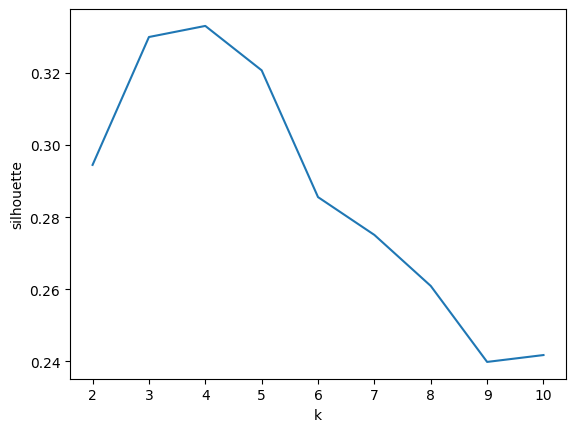

In [56]:
sns.lineplot(data = df_clustering_scores, y='silhouette', x='k')

In [57]:
clustering = sklearn.cluster.KMeans(n_clusters=4, random_state=13)
clustering.fit(X_stand)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,13
,copy_x,True
,algorithm,'lloyd'


In [58]:
pd.Series(clustering.labels_).value_counts()

0    410
1    178
3     84
2     40
Name: count, dtype: int64

In [60]:
X_stand['cluster_id'] = clustering.labels_
X_stand.head()

,Fare,Age,SibSp,Parch,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S,Survived,cluster_id
PassengerId,,,,,,,,,,,
1,-0.516380,-0.527669,0.522511,-0.506787,0.908600,1.0,False,False,True,0,0
2,0.694046,0.577094,0.522511,-0.506787,-1.482983,0.0,True,False,False,1,1
3,-0.503620,-0.251478,-0.552714,-0.506787,0.908600,0.0,False,False,True,1,0
4,0.350326,0.369951,0.522511,-0.506787,-1.482983,0.0,False,False,True,1,1
5,-0.501257,0.369951,-0.552714,-0.506787,0.908600,1.0,False,False,True,0,0


In [70]:
from matplotlib.lines import Line2D


In [61]:
pca = PCA(n_components=2, svd_solver="randomized", random_state=0)
D2_pca = pca.fit_transform(X_stand)

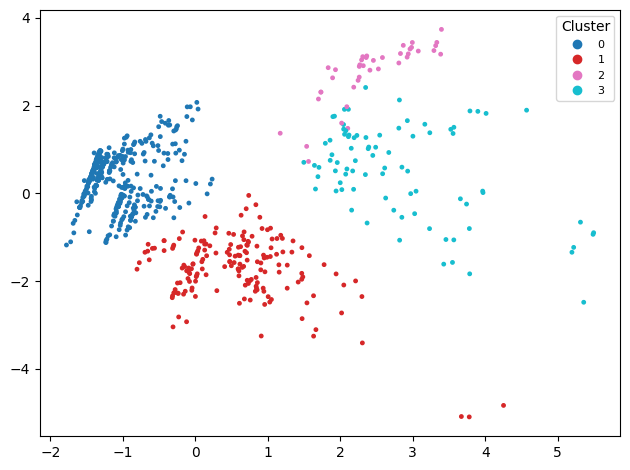

In [72]:
plt.figure()
scatter = plt.scatter(D2_pca[:, 0], D2_pca[:, 1], c=X_stand["cluster_id"], s=6, cmap="tab10")
colors = [scatter.cmap(scatter.norm(u)) for u in range(4)]
handles = [Line2D([0], [0], marker='o', linestyle='', color=c, label=str(u), markersize=6)
           for u, c in zip(range(4), colors)]

plt.legend(handles, [str(i) for i in sorted(np.unique(X_stand["cluster_id"]))], title="Cluster", loc="best", fontsize=8)
plt.tight_layout()
plt.show()

In [64]:
tsne = TSNE(n_components=2, perplexity=30, random_state=13)
D2_tsne = tsne.fit_transform(X_stand)  

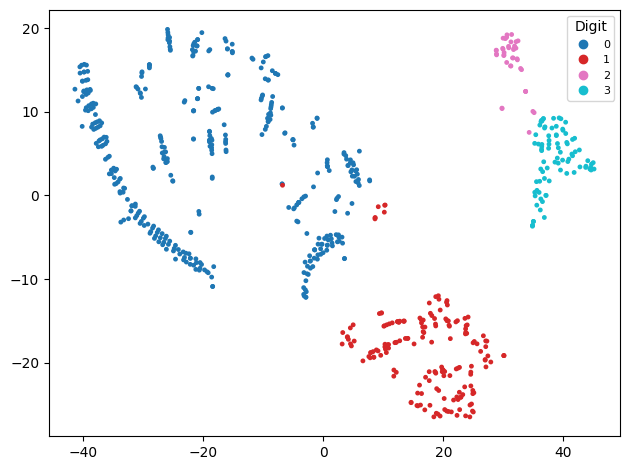

In [71]:
plt.figure()
scatter = plt.scatter(D2_tsne[:, 0], D2_tsne[:, 1], c=X_stand["cluster_id"], s=6, cmap="tab10")
colors = [scatter.cmap(scatter.norm(u)) for u in range(4)]
handles = [Line2D([0], [0], marker='o', linestyle='', color=c, label=str(u), markersize=6)
           for u, c in zip(range(4), colors)]

plt.legend(handles, [str(i) for i in sorted(np.unique(X_stand["cluster_id"]))], title="Digit", loc="best", fontsize=8)
plt.tight_layout()
plt.show()